In [1]:
import spacy
import pandas as pd

### Get current working directory

### Config Variables

In [2]:
#inputLanguage = "english"
nlp = spacy.load('en_core_web_lg')
LOADFILE = "C:\\Users\\fenn\Desktop\\tryPython\\summarizedWords(9).txt"
SAVEFILE = "C:\\Users\\fenn\Desktop\\tryPython\\distanceMatrix_(9).txt"  # change according to your needs
#print(pd.read_csv(LOADFILE, delimiter="\t").iloc[:, 0])  # for debug

### Data preparation

In [9]:
rawData = pd.read_csv(LOADFILE, delimiter="\t").iloc[:, 0].str.cat(others=None, sep=" ", na_rep=None, join='left') # reads in the file specified by LOADFILE, converting it to a single string of words separated by a blankspace




tokens = nlp(rawData)

##cleans up data olny for concepts in the model
# Defined as a function to be used on multiple datasets if necessary 
def cleanData(data):
    cleanTokens = []
    for token in tokens:
        if not token.is_oov:
            cleanTokens.append(token) 
    return cleanTokens

cleanTokens = cleanData(tokens)

### determining string distances

In [10]:
## Creates a matrix of word similarities
def calcDistanceMatrix(cleanTokens):
    df = pd.DataFrame(columns=cleanTokens, index = cleanTokens) # builds al empty pandas dataframe with rows and columns named after the words to be analyzed
    for token in cleanTokens:
        similiarities = []
        for token2 in cleanTokens:
            similiarities.append(token.similarity(token2))
        df[token] = similiarities
    return df

distanceMatrixDF = calcDistanceMatrix(cleanTokens)


#### Printing the Matrix (for testing/debug only)

In [11]:
print(distanceMatrixDF)

                atmosphere   benefit  conflicts  continuous      cost  \
atmosphere        1.000000  0.223023   0.223700    0.260766  0.178016   
benefit           0.223023  1.000000   0.250499    0.325303  0.525185   
conflicts         0.223700  0.250499   1.000000    0.242969  0.188374   
continuous        0.260766  0.325303   0.242969    1.000000  0.270875   
cost              0.178016  0.525185   0.188374    0.270875  1.000000   
damage            0.198096  0.380937   0.253372    0.266671  0.429101   
data              0.122180  0.298778   0.247893    0.356893  0.338244   
ease              0.312324  0.404872   0.302731    0.355645  0.368636   
expensive         0.246897  0.373266   0.137353    0.193070  0.682025   
funding           0.113157  0.568469   0.297500    0.234599  0.438565   
health            0.216186  0.567236   0.294831    0.226353  0.421882   
involvement       0.251159  0.460345   0.462045    0.309250  0.206166   
poverty           0.212788  0.371601   0.404798    

### Exporting a .txt file to/with the location specified by the SAVEFILE variable

In [12]:
#export DataFrame to text file
with open(SAVEFILE, 'w') as f:  # overwrites existing files of the same name and path. If you want to change that: change line to with open(SAVEFILE, 'x') as f:
    distMatString = distanceMatrixDF.to_string(header=True, index=True)
    f.write(distMatString)

In [66]:
# DELETE LATER
import numpy as np

text1 = 'war' # accountability
text2 = 'peace' # responsibility
doc1 = nlp(text1)
doc2 = nlp(text2)
print("spaCy :", doc1.similarity(doc2))

print(np.dot(doc1.vector, doc2.vector) / (np.linalg.norm(doc1.vector) * np.linalg.norm(doc2.vector)))
#print(np.dot(doc1.vector, doc2.vector) /np.dot( np.sqrt(np.square(doc1.vector)),  np.sqrt(np.square(doc2.vector))))

#print(np.linalg.norm(doc1.vector))
#print(np.dot(doc1.vector, doc2.vector))
print(len(doc1.vector))


spaCy : 0.5524851490455082
0.5524851
0.7179676
300


In [22]:
import spacy
nlp = spacy.load('en_core_web_lg')

doc = nlp("Apple is looking at buying U.K. startup for $1 billion. I like apples. Apple is a big company. New York, Red Flag, I have a red flag.")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label, ent.label_)

print(nlp.get_pipe('ner').labels)

Apple 0 5 383 ORG
U.K. 27 31 384 GPE
$1 billion 44 54 394 MONEY
Apple 71 76 383 ORG
New York 95 103 384 GPE
Red Flag 105 113 383 ORG
('CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART')


In [13]:
import spacy
import numpy as np
nlp = spacy.load('en_core_web_lg')

def most_similar(word, topn=5):
  word = nlp.vocab[str(word)]
  queries = [
      w for w in word.vocab 
      if w.is_lower == word.is_lower  and np.count_nonzero(w.vector)
  ]

  by_similarity = sorted(queries, key=lambda w: word.similarity(w), reverse=True)
  return [(w.lower_,w.similarity(word)) for w in by_similarity[:topn+1] if w.lower_ != word.lower_]

print(most_similar("dog", topn=13))

[('she', 0.41524189710617065), ('when', 0.40957537293434143), ('he', 0.390671044588089), ('how', 0.38315147161483765), ('does', 0.37388527393341064), ('let', 0.37291908264160156), ('that', 0.3664986193180084), ('what', 0.3649815320968628), ('you', 0.3649410009384155), ('who', 0.36284059286117554), ('where', 0.36010709404945374), ("n't", 0.35870176553726196), ('they', 0.35863903164863586)]


In [14]:
import spacy
nlp = spacy.load("en_core_web_md")

text = "I have a text file that contains the content of a web page that I have extracted using BeautifulSoup. I need to find N similar words from the text file based on a given word. The process is as follows"
doc = nlp(text)
words = ['goal', 'soccer']

# compute similarity    
similarities = {}   
for word in words:
    tok = nlp(word)
    similarities[tok.text] ={}
    for tok_ in doc:
        similarities[tok.text].update({tok_.text:tok.similarity(tok_)})

# sort
top10 = lambda x: {k: v for k, v in sorted(similarities[x].items(), key=lambda item: item[1], reverse=True)[:10]}

# desired output
top10("goal")

{'need': 0.41729573323136326,
 'that': 0.41562776244397887,
 'to': 0.40102258054859163,
 'is': 0.3742535885023554,
 'the': 0.37350038025851406,
 'The': 0.37350038025851406,
 'given': 0.35950243566127893,
 'process': 0.3521810053937122,
 'have': 0.34597281472837316,
 'as': 0.3443365347357821}

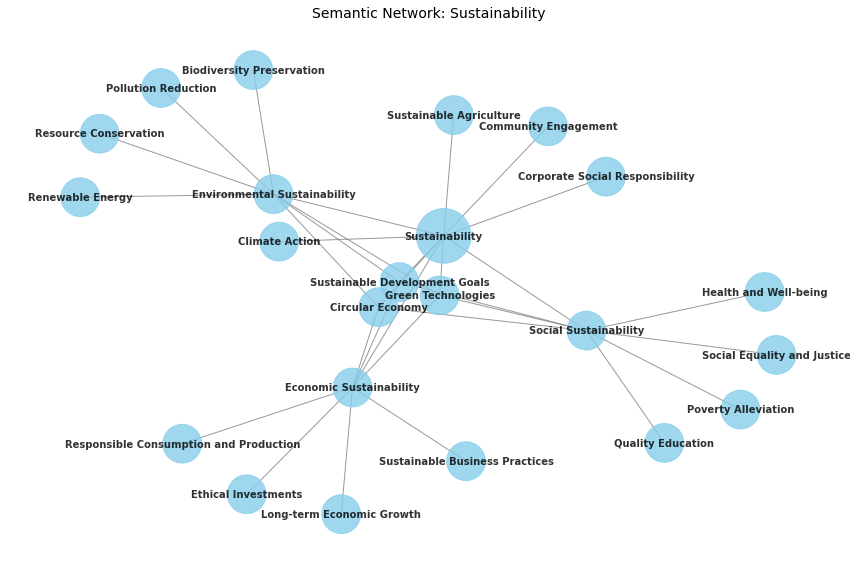

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_semantic_network():
    G = nx.Graph()

    # Add nodes
    main_node = "Sustainability"
    G.add_node(main_node)

    subcategories = [
        ("Environmental Sustainability", ["Renewable Energy", "Resource Conservation", "Biodiversity Preservation", "Pollution Reduction"]),
        ("Social Sustainability", ["Quality Education", "Health and Well-being", "Poverty Alleviation", "Social Equality and Justice"]),
        ("Economic Sustainability", ["Sustainable Business Practices", "Responsible Consumption and Production", "Ethical Investments", "Long-term Economic Growth"]),
    ]

    for category, sub_items in subcategories:
        G.add_node(category)
        for sub_item in sub_items:
            G.add_node(sub_item)
            G.add_edge(category, sub_item)

        G.add_edge(main_node, category)

    overlapping_concepts = ["Circular Economy", "Green Technologies", "Sustainable Development Goals"]
    supporting_concepts = ["Corporate Social Responsibility", "Climate Action", "Sustainable Agriculture", "Community Engagement"]

    for concept in overlapping_concepts + supporting_concepts:
        G.add_node(concept)
        G.add_edge(main_node, concept)

    for concept in overlapping_concepts:
        for category, _ in subcategories:
            G.add_edge(category, concept)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility

    node_sizes = [3000 if node == main_node else 1500 for node in G.nodes()]
    nx.draw_networkx(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=10, font_weight='bold', alpha=0.8, edge_color='gray', width=1.0)

    edge_labels = {(u, v): "" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Semantic Network: Sustainability", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_semantic_network()


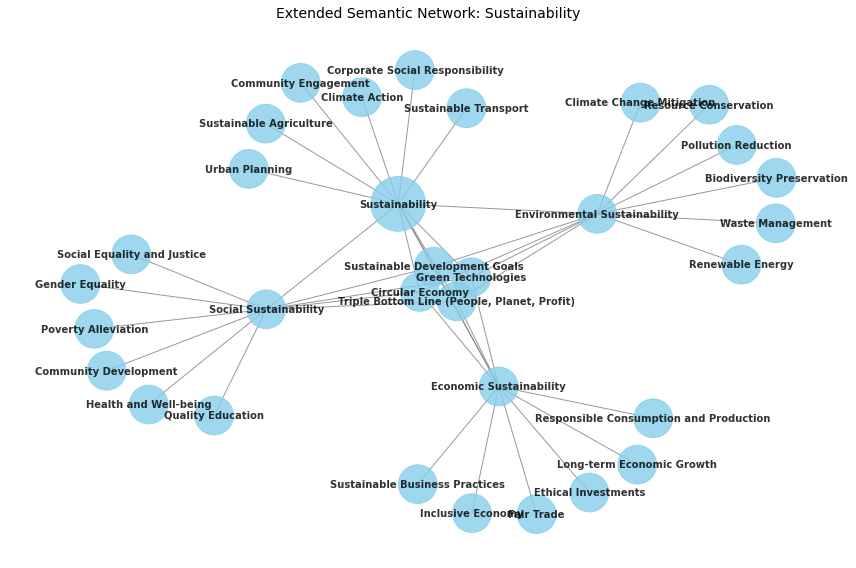

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_semantic_network():
    G = nx.Graph()

    # Add nodes
    main_node = "Sustainability"
    G.add_node(main_node)

    subcategories = [
        ("Environmental Sustainability", ["Renewable Energy", "Resource Conservation", "Biodiversity Preservation", "Pollution Reduction", "Waste Management", "Climate Change Mitigation"]),
        ("Social Sustainability", ["Quality Education", "Health and Well-being", "Poverty Alleviation", "Social Equality and Justice", "Gender Equality", "Community Development"]),
        ("Economic Sustainability", ["Sustainable Business Practices", "Responsible Consumption and Production", "Ethical Investments", "Long-term Economic Growth", "Fair Trade", "Inclusive Economy"]),
    ]

    for category, sub_items in subcategories:
        G.add_node(category)
        for sub_item in sub_items:
            G.add_node(sub_item)
            G.add_edge(category, sub_item)

        G.add_edge(main_node, category)

    overlapping_concepts = ["Circular Economy", "Green Technologies", "Sustainable Development Goals", "Triple Bottom Line (People, Planet, Profit)"]
    supporting_concepts = ["Corporate Social Responsibility", "Climate Action", "Sustainable Agriculture", "Community Engagement", "Urban Planning", "Sustainable Transport"]

    for concept in overlapping_concepts + supporting_concepts:
        G.add_node(concept)
        G.add_edge(main_node, concept)

    for concept in overlapping_concepts:
        for category, _ in subcategories:
            G.add_edge(category, concept)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility

    node_sizes = [3000 if node == main_node else 1500 for node in G.nodes()]
    nx.draw_networkx(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=10, font_weight='bold', alpha=0.8, edge_color='gray', width=1.0)

    edge_labels = {(u, v): "" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Extended Semantic Network: Sustainability", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_semantic_network()


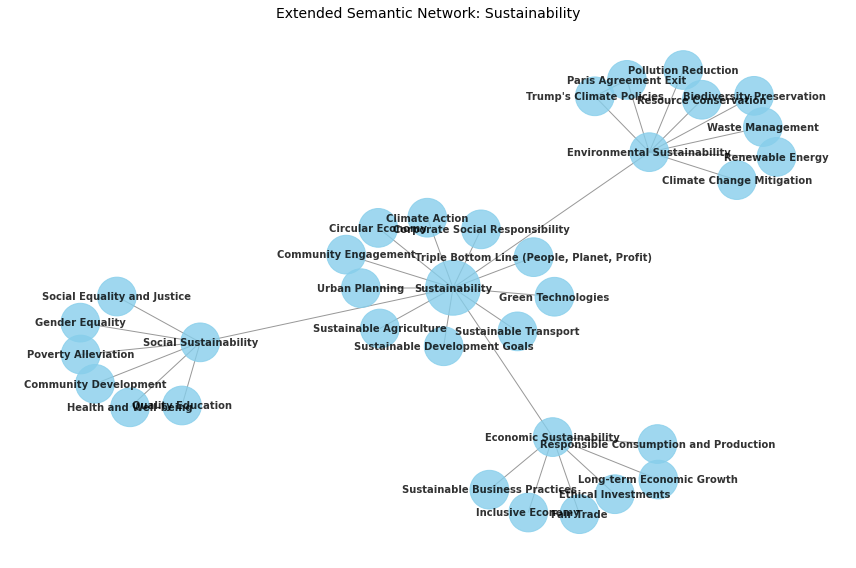

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_semantic_network():
    G = nx.Graph()

    # Add nodes
    main_node = "Sustainability"
    G.add_node(main_node)

    subcategories = [
        ("Environmental Sustainability", ["Renewable Energy", "Resource Conservation", "Biodiversity Preservation", "Pollution Reduction", "Waste Management", "Climate Change Mitigation"]),
        ("Social Sustainability", ["Quality Education", "Health and Well-being", "Poverty Alleviation", "Social Equality and Justice", "Gender Equality", "Community Development"]),
        ("Economic Sustainability", ["Sustainable Business Practices", "Responsible Consumption and Production", "Ethical Investments", "Long-term Economic Growth", "Fair Trade", "Inclusive Economy"]),
    ]

    for category, sub_items in subcategories:
        G.add_node(category)
        for sub_item in sub_items:
            G.add_node(sub_item)
            G.add_edge(category, sub_item)

        G.add_edge(main_node, category)

    overlapping_concepts = ["Circular Economy", "Green Technologies", "Sustainable Development Goals", "Triple Bottom Line (People, Planet, Profit)"]
    supporting_concepts = ["Corporate Social Responsibility", "Climate Action", "Sustainable Agriculture", "Community Engagement", "Urban Planning", "Sustainable Transport"]

    for concept in overlapping_concepts + supporting_concepts:
        G.add_node(concept)
        G.add_edge(main_node, concept)

    # Specific nodes related to Donald Trump
    G.add_node("Trump's Climate Policies")
    G.add_node("Paris Agreement Exit")
    G.add_edge("Trump's Climate Policies", "Environmental Sustainability")
    G.add_edge("Paris Agreement Exit", "Trump's Climate Policies")
    G.add_edge("Paris Agreement Exit", "Environmental Sustainability")

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility

    node_sizes = [3000 if node == main_node else 1500 for node in G.nodes()]
    nx.draw_networkx(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=10, font_weight='bold', alpha=0.8, edge_color='gray', width=1.0)

    edge_labels = {(u, v): "" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Extended Semantic Network: Sustainability", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_semantic_network()
